In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import datetime
from prophet import Prophet
%matplotlib inline
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams["figure.figsize"] = (14,10) #그림(figure)의 크기. (가로,세로) 인치 단위
plt.rcParams['lines.linewidth'] = 2 #선의 두께
# plt.rcParams['lines.color'] = 'r' #선의 색깔
plt.rcParams['axes.grid'] = True #차트내 격자선(grid) 표시 여부
# 경고메세지 무시용
pd.set_option('mode.chained_assignment',  None) 

from multiprocessing import Pool, cpu_count
from tqdm import tqdm
from multiprocessing.dummy import Pool
from prophet import Prophet

timeseries = dict()

def get_timeserie(id):
    return timeseries[id]
#     return (timeseries[id], 14, True)

def run_prophet(id, periods=14, include_history=True):
    timeserie = get_timeserie(id)
    model = Prophet(uncertainty_samples=False)
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=periods, include_history=include_history)
    forecast = model.predict(forecast)
#     return np.append(np.array([id]),forecast['yhat'].values.transpose())
    return (id, forecast)

def run_main(symbol, title, periods=[50, 20], **k):
    df = fdr.DataReader(symbol, '2015')
    #dft = df[-1000:]
    dft = df[-1000:]
    for n in periods:
        dft['ndays_high'] = dft['High'].rolling(window=n, min_periods=1).max()
        dft['ndays_low'] = dft['Low'].rolling(window=n, min_periods=1).min()
        dfh = pd.DataFrame(dft.sort_index().reset_index(), columns=['Date', 'Close', 'ndays_high', 'ndays_low'])
        dfhh = dfh.rename(columns = {'Date':'ds', 'ndays_high':'y'})
        dfhl = dfh.rename(columns = {'Date':'ds', 'ndays_low':'y'})
        dfhc = dfh.rename(columns = {'Date':'ds', 'Close':'y'})
        global timeseries
        timeseries = {
            1:dfhh, 2:dfhl, 3:dfhc
        }
        keys = list(timeseries.keys())
        print(f'Parallelism on {cpu_count()} CPU')
        with Pool(cpu_count()) as p:
            predictions  = list(tqdm(p.imap(run_prophet, keys), total=len(keys)))

        plt.subplot(211)
        plt.plot(dfh['Date'], dfh['Close'], label='실제종가')
        plt.plot(predictions[0][1]['ds'], predictions[0][1]['yhat'], label='최대예측')
        plt.plot(predictions[1][1]['ds'], predictions[1][1]['yhat'], label='최소예측')
        plt.plot(predictions[2][1]['ds'], predictions[2][1]['yhat'], label='종가예측')
        plt.legend()
        plt.title(title)
        plt.subplot(212)
        plt.plot(dfh['Date'][-50:], dfh['Close'][-50:], label='실제종가')
        plt.plot(predictions[0][1]['ds'][-50-14:], predictions[0][1]['yhat'][-50-14:], label='최대예측')
        plt.plot(predictions[1][1]['ds'][-50-14:], predictions[1][1]['yhat'][-50-14:], label='최소예측')
        plt.plot(predictions[2][1]['ds'][-50-14:], predictions[2][1]['yhat'][-50-14:], label='종가예측')
        plt.legend()
        plt.title(title)
        plt.show()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Parallelism on 16 CPU


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:10<00:00,  3.51s/it]


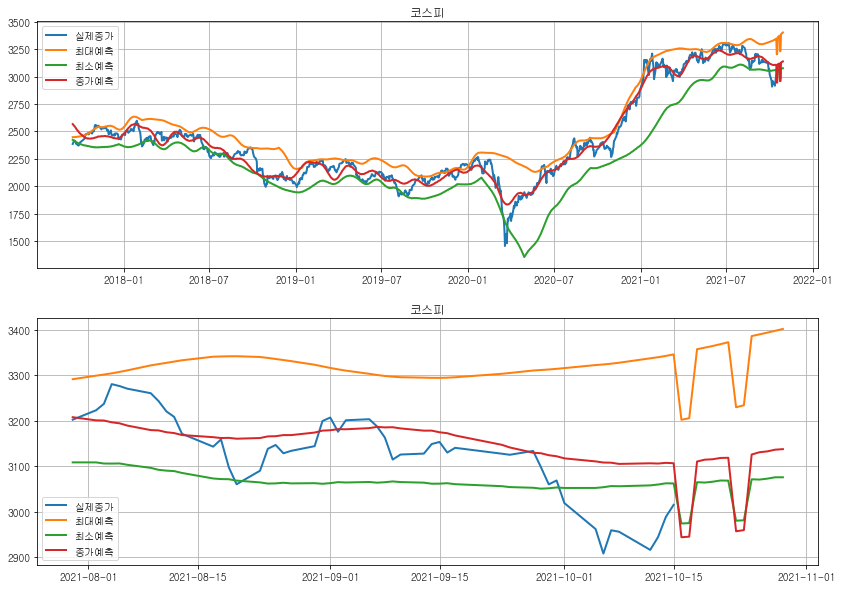

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parallelism on 16 CPU


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.06s/it]


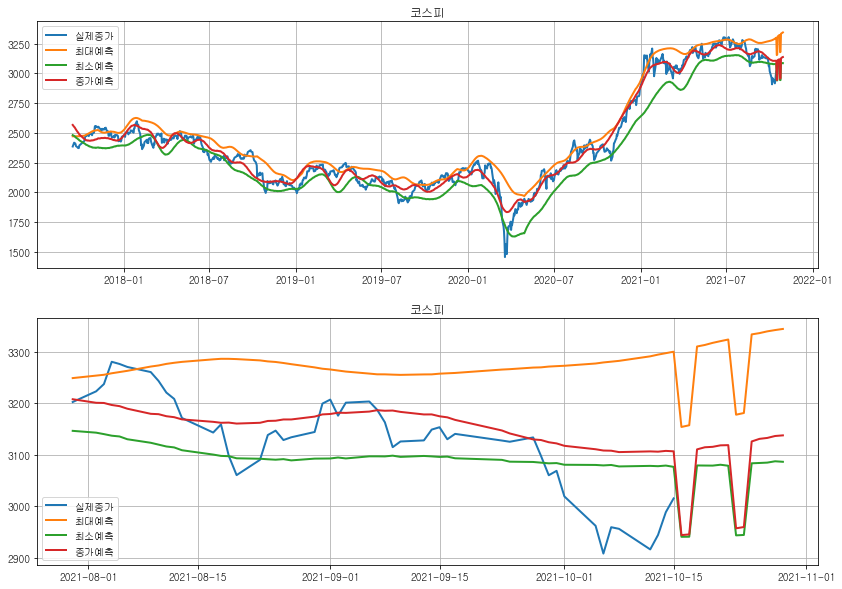

In [2]:
run_main('KS11', '코스피')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parallelism on 16 CPU


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.07s/it]


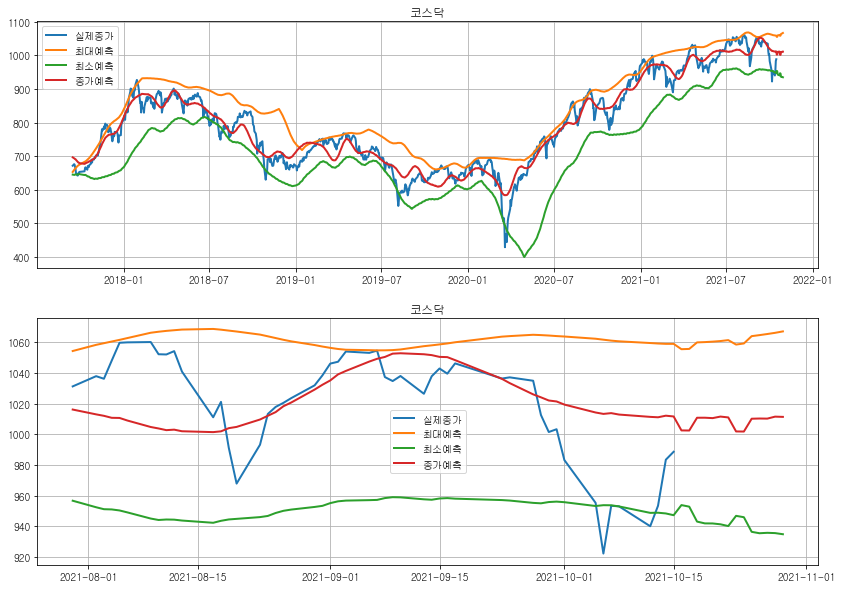

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parallelism on 16 CPU


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.61s/it]


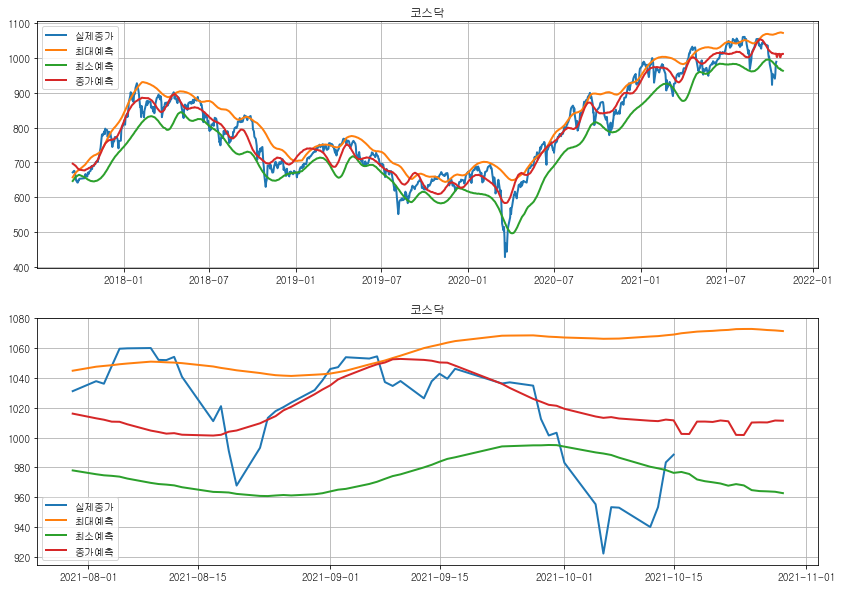

In [3]:
run_main('KQ11', '코스닥')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parallelism on 16 CPU


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:18<00:00,  6.05s/it]


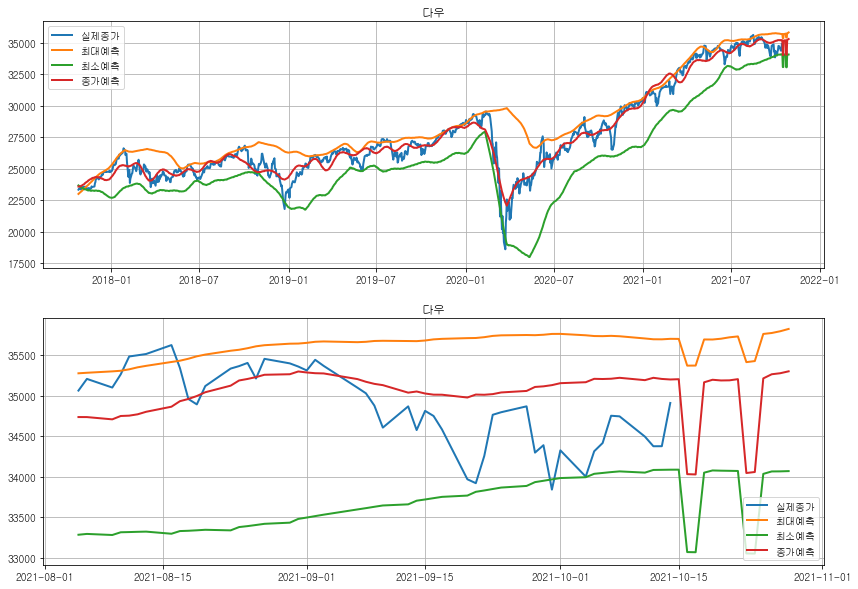

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parallelism on 16 CPU


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.78s/it]


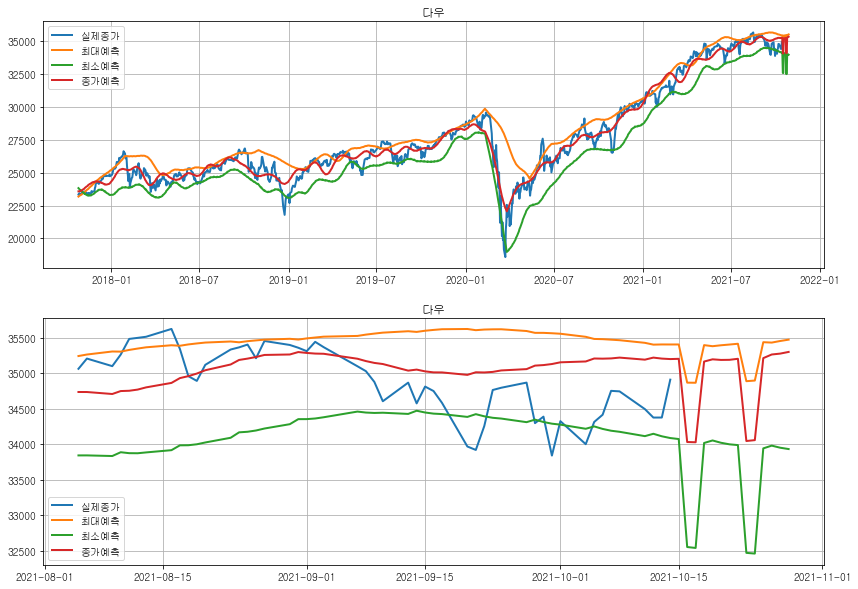

In [4]:
run_main('DJI', '다우')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parallelism on 16 CPU


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.35s/it]


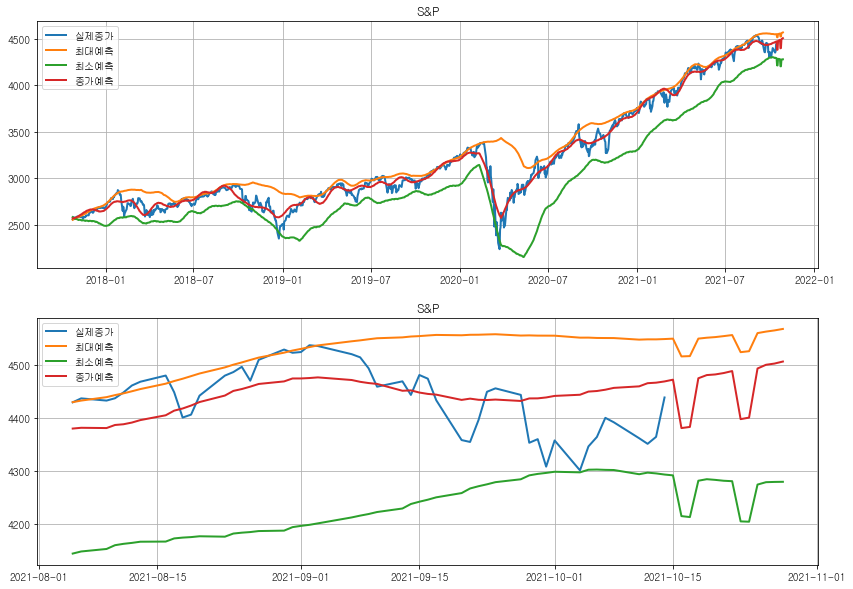

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parallelism on 16 CPU


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:12<00:00,  4.13s/it]


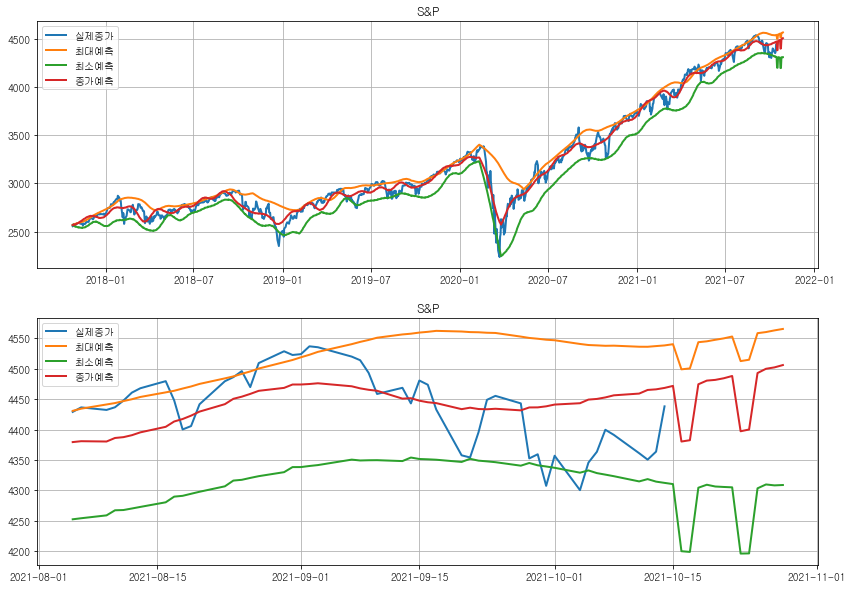

In [5]:
run_main('US500', 'S&P')